# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
data = pd.read_csv('/kaggle/input/dry-eye-disease/Dry_Eye_Dataset.csv')

In [3]:
data.head(3)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N


In [4]:
data.isna().sum()

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

# Distribution of Dry Eye Disease

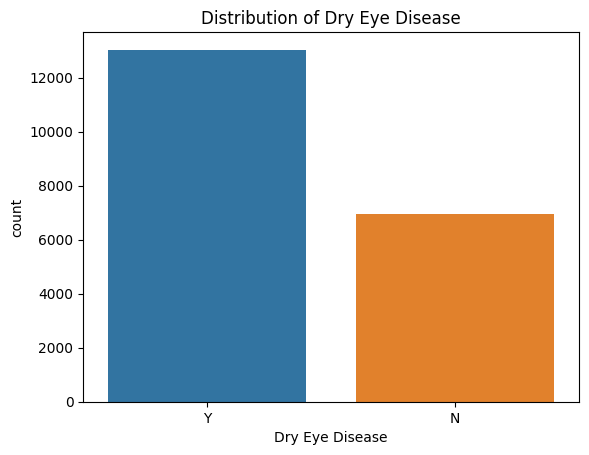

In [5]:
sns.countplot(x='Dry Eye Disease', data=data)
plt.title('Distribution of Dry Eye Disease')
plt.show()

# Visualizing relationships between features and the target variable

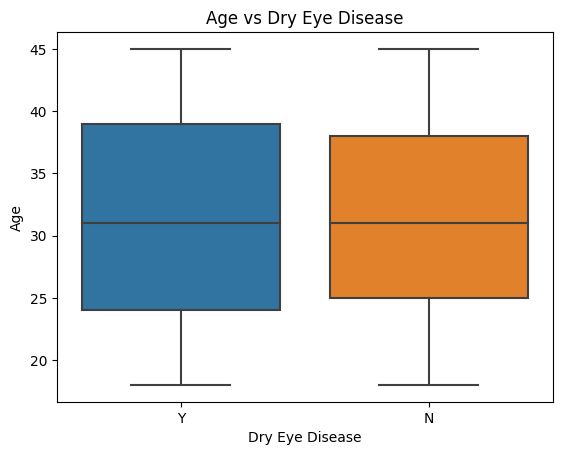

In [6]:
sns.boxplot(x='Dry Eye Disease', y='Age', data=data)
plt.title('Age vs Dry Eye Disease')
plt.show()

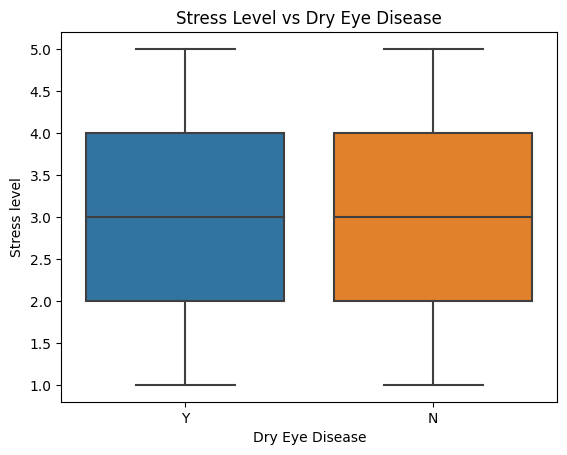

In [7]:
sns.boxplot(x='Dry Eye Disease', y='Stress level', data=data)
plt.title('Stress Level vs Dry Eye Disease')
plt.show()

# Pairplot for selected features

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

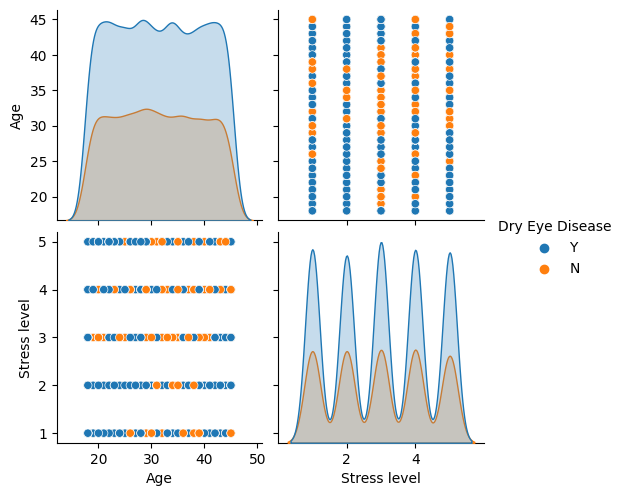

In [8]:
selected_features = ['Age', 'Stress level', 'Caffeine consumption', 'Dry Eye Disease']
sns.pairplot(data[selected_features], hue='Dry Eye Disease')
plt.show()

# Number of People with Dry Eye Disease by Feel sleepy during day

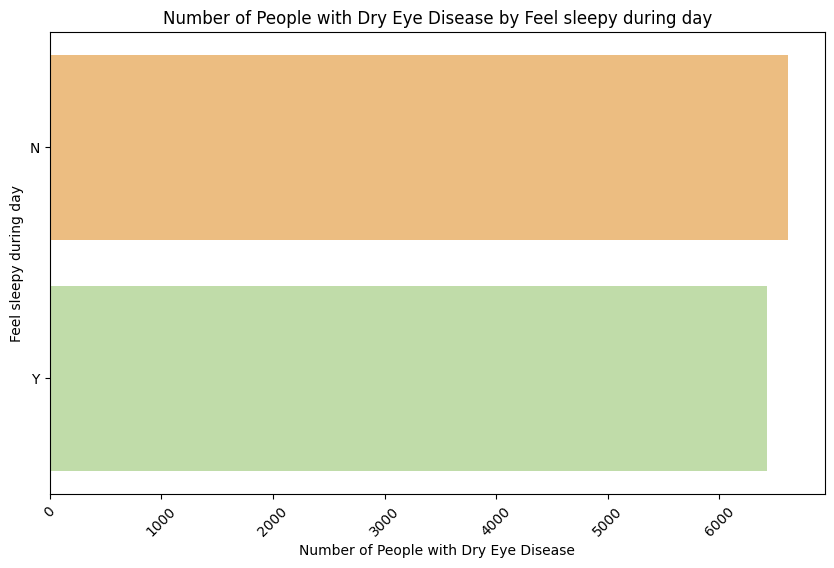

In [9]:
Dry_count = data[data['Dry Eye Disease'] == 'Y'].groupby('Feel sleepy during day').size().reset_index(name='count')
Dry_count = Dry_count.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=Dry_count, y='Feel sleepy during day', x='count', palette='Spectral')
plt.title('Number of People with Dry Eye Disease by Feel sleepy during day')
plt.xlabel('Number of People with Dry Eye Disease')
plt.ylabel('Feel sleepy during day')
plt.xticks(rotation=45)
plt.show()